In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from scipy import stats
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [71]:
# read file and remove duplicate columns
df = pd.concat([pd.read_csv("csv/data source 1.csv"), pd.read_csv("csv/data source 2.csv")], axis=1)
df = df.loc[:,~df.columns.duplicated()]
# df.to_csv('csv/data.csv', index=False)

In [72]:
country_code = 'PHL'
# get data of one country
df_country = df.loc[df['Code'] == country_code]
# df_country = df
X = df_country.drop(['Annual HPI', 'Country', 'Code', 'Year'], axis = 1)
y = df_country['Annual HPI']

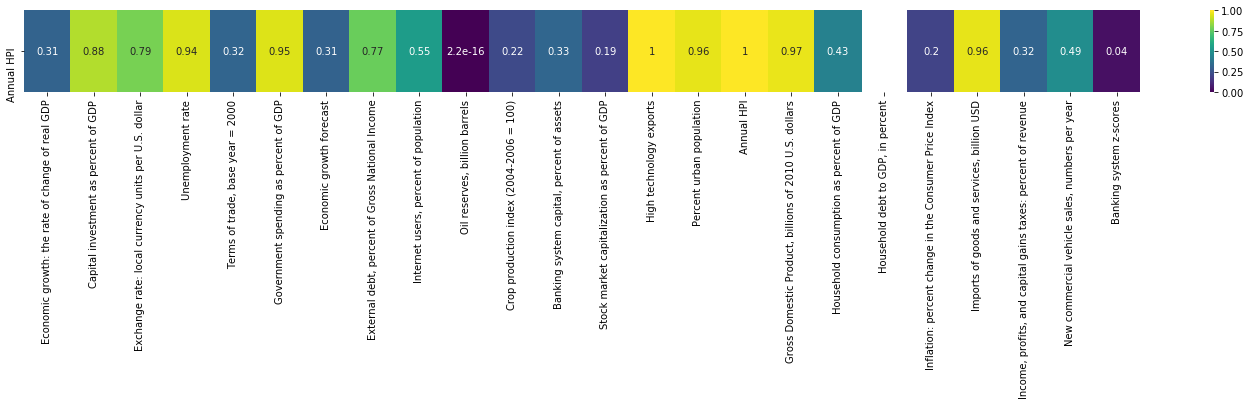

In [73]:
# Using Pearson Correlation to select IV
plt.figure(figsize=(25,1.5))
cor = df_country.drop(['Country', 'Code', 'Year'], axis = 1).corr()[15:16].abs()
sns.heatmap(cor, annot=True, cmap="viridis")
# plt.show()
plt.savefig('./image/CorrelationTable1.png', dpi=300, bbox_inches='tight')

In [74]:
# Columns to remove first
cor['Annual HPI'].loc[abs(cor['Annual HPI'])<=0.5]

Series([], Name: Annual HPI, dtype: float64)

In [75]:
# CHN
# df_remove1 = df_country.drop(['Country', 'Code', 'Year', 
#                               'Exchange rate: local currency units per U.S. dollar', 
#                               'Terms of trade, base year = 2000', 
#                               'External debt, percent of Gross National Income',
#                               'Stock market capitalization as percent of GDP',
#                               'Inflation: percent change in the Consumer Price Index'], axis = 1)

# JPN
# df_remove1 = df_country.drop(['Country', 'Code', 'Year', 
#                               'Exchange rate: local currency units per U.S. dollar', 
#                               'Terms of trade, base year = 2000', 
#                               'External debt, percent of Gross National Income',
#                               'Stock market capitalization as percent of GDP',
#                               'Inflation: percent change in the Consumer Price Index',
#                               'Economic growth: the rate of change of real GDP',
#                               'Government spending as percent of GDP',
#                               'Economic growth forecast',
#                               'Oil reserves, billion barrels',
#                               'Imports of goods and services, billion USD',
#                               'Income, profits, and capital gains taxes: percent of revenue'], axis = 1)

# IND
# df_remove1 = df_country.drop(['Country', 'Code', 'Year', 
#                               'Exchange rate: local currency units per U.S. dollar', 
#                               'Terms of trade, base year = 2000', 
#                               'External debt, percent of Gross National Income',
#                               'Stock market capitalization as percent of GDP',
#                               'Inflation: percent change in the Consumer Price Index',
#                               'Economic growth: the rate of change of real GDP',
#                               'Government spending as percent of GDP',
#                               'Economic growth forecast',
#                               'Oil reserves, billion barrels',
#                               'Imports of goods and services, billion USD',
#                               'Income, profits, and capital gains taxes: percent of revenue',
#                               'Banking system z-scores'], axis = 1)

# PHL
df_remove1 = df_country.drop(['Country', 'Code', 'Year', 
                              'Exchange rate: local currency units per U.S. dollar', 
                              'Terms of trade, base year = 2000', 
                              'External debt, percent of Gross National Income',
                              'Stock market capitalization as percent of GDP',
                              'Inflation: percent change in the Consumer Price Index',
                              'Economic growth: the rate of change of real GDP',
                              'Economic growth forecast',
                              'Oil reserves, billion barrels',
                              'Imports of goods and services, billion USD',
                              'Income, profits, and capital gains taxes: percent of revenue',
                              'Banking system z-scores', 
                              'Crop production index (2004-2006 = 100)',
                              'Banking system capital, percent of assets', 
                              'Household consumption as percent of GDP', 
                              'Household debt to GDP, in percent'], axis = 1)

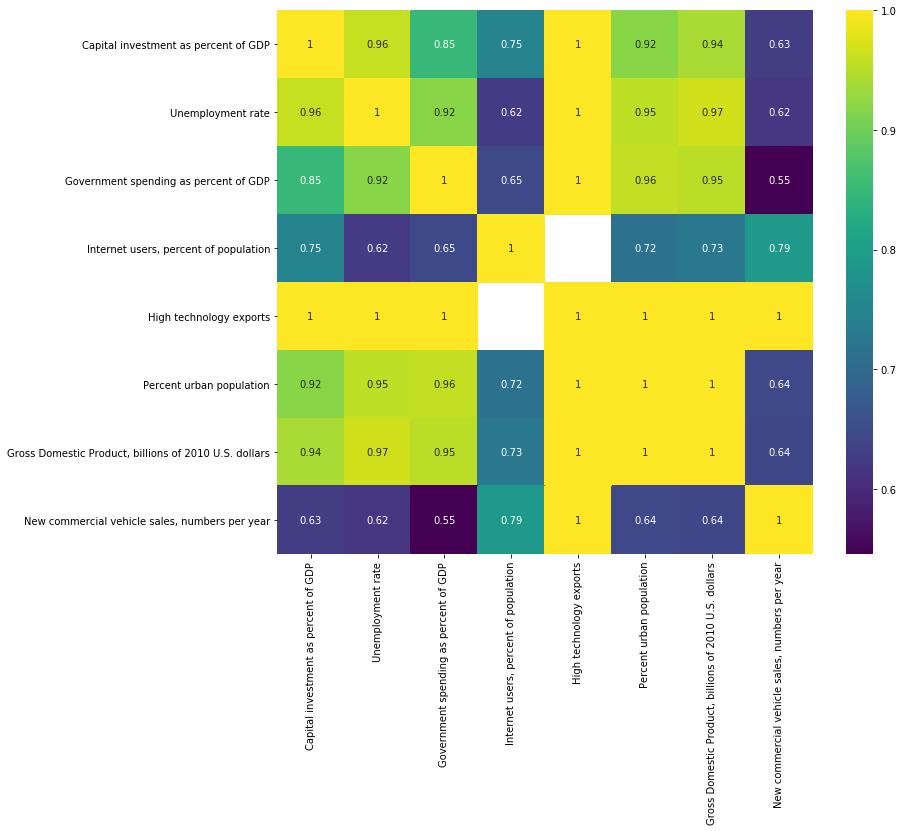

In [76]:
cor1 = df_remove1.drop(['Annual HPI'], axis = 1).corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(cor1, annot=True, cmap="viridis")
# plt.show()
plt.savefig('./image/CorrelationTable2.png', dpi=300, bbox_inches='tight')

In [77]:
# From the above graph we know that most of the variables are highly correlated.
# We choose unemployment rate and 
# 'New commercial vehicle sales, numbers per year'
# As those two variables are least correlated.
df_remove2 = df_country[['Country', 'Code', 'Year', 
                         'Unemployment rate',
#                          'New commercial vehicle sales, numbers per year',
                         'Government spending as percent of GDP',
                         'Annual HPI']]
X = df_remove2.iloc[:,3:-1]
y = df_remove2['Annual HPI']

In [78]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
# model.resid
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Annual HPI   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     54.40
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           2.20e-05
Time:                        15:31:46   Log-Likelihood:                -45.610
No. Observations:                  11   AIC:                             97.22
Df Residuals:                       8   BIC:                             98.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/Users/tiankai/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


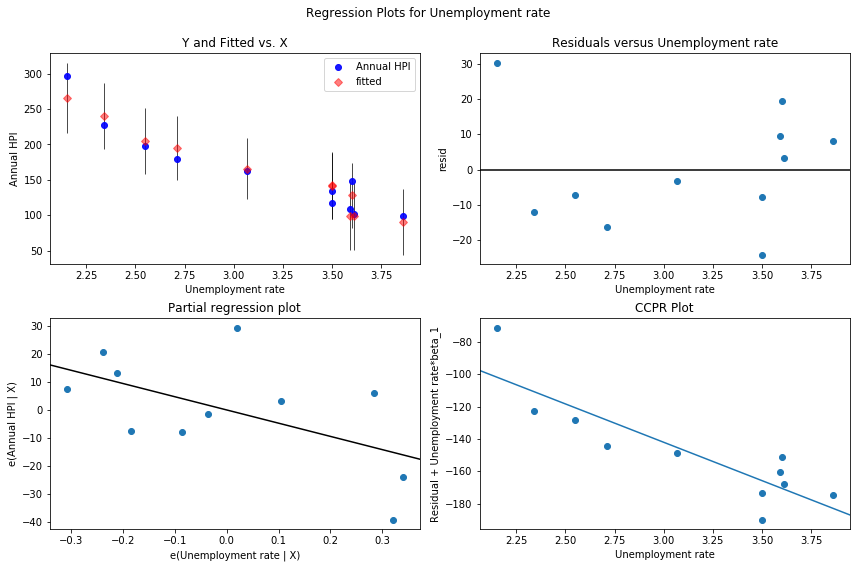

In [79]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Unemployment rate', fig=fig)
plt.savefig('./image/Resid_unemployment_' + country_code + '.png', dpi=300)

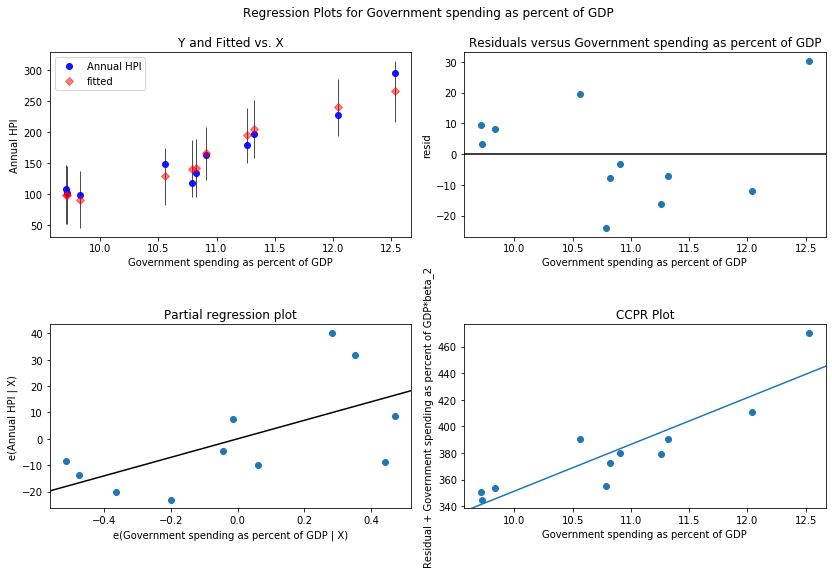

In [80]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Government spending as percent of GDP', fig=fig)
plt.savefig('./image/Resid_gs_' + country_code + '.png', dpi=300)

In [81]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9772924184799194, pvalue=0.9492367506027222)

In [82]:
stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.5445262080791782, pvalue=0.0013854288164271162)

In [83]:
#perform Bresuch-Pagan test
lzip(['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value'], sms.het_breuschpagan(model.resid, model.model.exog))

[('Lagrange multiplier statistic', 4.869367308310705),
 ('p-value', 0.08762546261495781),
 ('f-value', 3.1770732667847708),
 ('f p-value', 0.09648292171793565)]

In [128]:
table0_0 = model.summary2().tables[0][[0,1]]
table0_1 = model.summary2().tables[0][[2,3]]
table0_1.columns=[0,1]

table1 = pd.DataFrame ({
    0:  ['const_Coef.', 'const_Std.Err.', 'const_t', 'const_P>|t|', 
         'UnemploymentRate_Coef.', 'UnemploymentRate_Std.Err.', 'UnemploymentRate_t', 'UnemploymentRate_P>|t|',
         'GovSpending_Coef.', 'GovSpending_Std.Err.', 'GovSpending_t', 'GovSpending_P>|t|'],
    1:  model.summary2().tables[1].iloc[0].values.tolist()[:4] + model.summary2().tables[1].iloc[1].values.tolist()[:4] + model.summary2().tables[1].iloc[2].values.tolist()[:4]
}, columns = [0,1])

table2_0 = model.summary2().tables[2][[0,1]]
table2_1 = model.summary2().tables[2][[2,3]]
table2_1.columns=[0,1]
results.append(pd.concat([table0_0, table0_1, table1, table2_0, table2_1], ignore_index=True).drop([2]))

/Users/tiankai/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [71]:
results = []

In [139]:
table_result = pd.concat([results[0], results[1].iloc[:,1], results[2].iloc[:,1], results[3].iloc[:,1]], axis=1)
table_result.columns=['', 'Japan', 'China', 'Philippines', 'India']
print(table_result.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
                           &        Japan &        China & Philippines &        India \\
\midrule
                    Model: &          OLS &          OLS &         OLS &          OLS \\
       Dependent Variable: &   Annual HPI &   Annual HPI &  Annual HPI &   Annual HPI \\
         No. Observations: &           11 &           11 &          11 &           11 \\
                 Df Model: &            2 &            2 &           2 &            2 \\
             Df Residuals: &            8 &            8 &           8 &            8 \\
                R-squared: &        0.965 &        0.957 &       0.932 &        0.851 \\
           Adj. R-squared: &        0.956 &        0.946 &       0.914 &        0.814 \\
                      AIC: &      35.5778 &      59.7291 &     97.2204 &     109.2955 \\
                      BIC: &      36.7715 &      60.9228 &     98.4141 &     110.4891 \\
           Log-Likelihood: &      -14.789 &      -26.865 &     -45.61